In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import torch
import pandas as pd

In [6]:
with open('accuracy.pickle', 'rb') as file:
    acc_train = pickle.load(file)
    acc_test = pickle.load(file) 

In [7]:
with open('loss.pickle', 'rb') as file:
    loss_train = pickle.load(file)
    loss_test = pickle.load(file) 

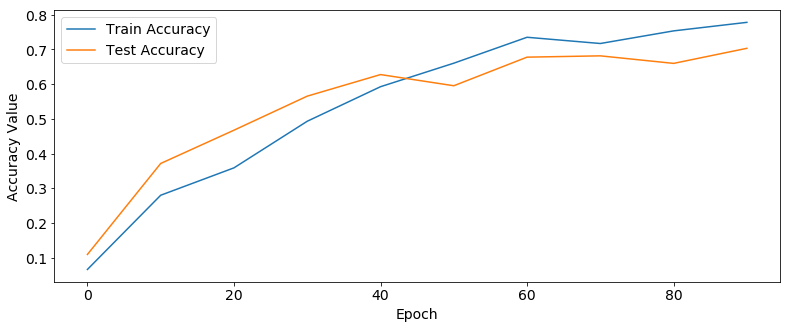

In [9]:
plt.rcParams["figure.figsize"] = (13, 5)
plt.rc('font', size=14)
sns.lineplot(x=np.arange(0, 100, 10), y=acc_train, label="Train Accuracy")
sns.lineplot(x=np.arange(0, 100, 10), y=acc_test, label="Test Accuracy")
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Accuracy Value")
plt.savefig('accuracies_rnn.png')

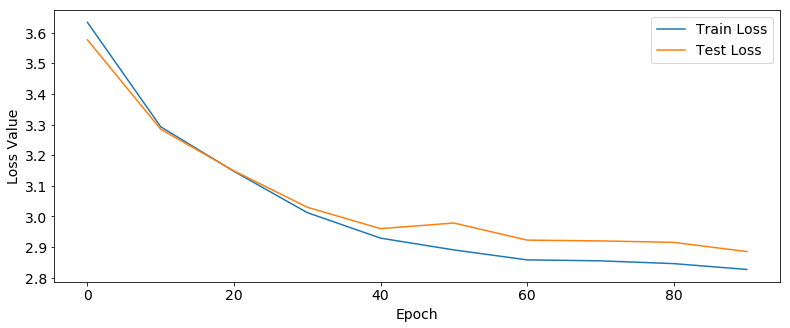

In [10]:
plt.rcParams["figure.figsize"] = (13, 5)
plt.rc('font', size=14)
sns.lineplot(x=np.arange(0, 100, 10), y=loss_train, label="Train Loss")
sns.lineplot(x=np.arange(0, 100, 10), y=loss_test, label="Test Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.savefig('losses_rnn.png')

In [12]:
with open('preds.pickle', 'rb') as file:
    preds = pickle.load(file)
    targets = pickle.load(file) 

In [13]:
preds_values = []
for pred in preds:
    pred = pred.detach()
    preds_values.append(pred.argmax(dim=1).item())
    
target_values = []
for target in targets:
    target_values.append(target.item())

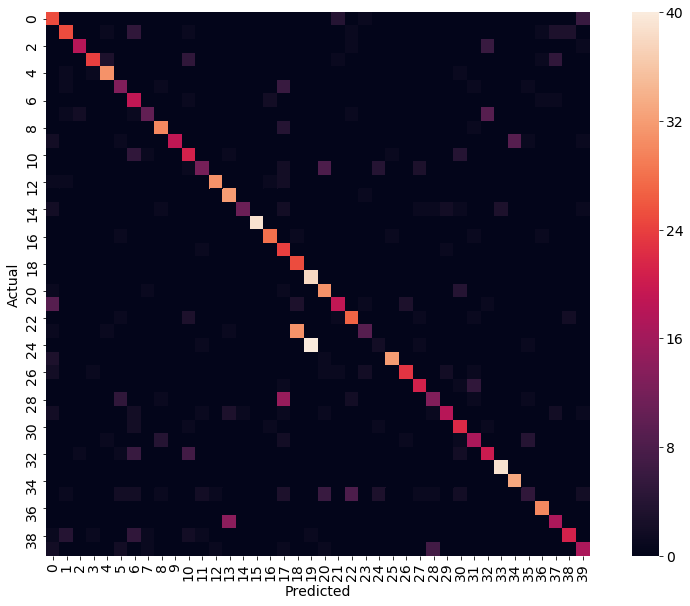

In [14]:
data = {'y_Actual': target_values, 'y_Predicted': preds_values}
df = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
df.rename(columns={"0.0": "Unseen", "1.0": "Seen"})
confusion = pd.crosstab(df['y_Actual'],
                        df['y_Predicted'],
                        rownames=['Actual'],
                        colnames=['Predicted'])
plt.figure(figsize=(15, 10))
plt.rc('font', size=14)
sns.heatmap(confusion,fmt='g', square=True)
plt.savefig('confusion_rnn.png')